# Introduction to scientific computing with Python

*Merci à [Maxime Sangnier](https://perso.lpsm.paris/~msangnier/) d'avoir partagé avec nous ses TPs.*


## Part 2: Plotting
This part is aimed at introducing the most used Python package for 2D-plotting: [Matplotlib](http://matplotlib.org/contents.html).

# Table of contents
1. [Plotting curves](#part1)
    - [First example](#part1sec1)
    - [Matplotlib APIs](#part1sec2)
    - [Customization](#part1sec3)
    - [Interactive mode](#part1sec4)
    - [Seaborn](#part1sec5)
1. [Other plots ](#part2)
    - [Image](#part2sec1)
    - [Scatter](#part2sec2)
    - [Stem ](#part2sec3)
    - [Histogram](#part2sec4)
    - [Bar chart](#part2sec5)
    - [3D plotting](#part2sec6)
    - [Pie chart](#part2sec7)
1. [Saving figures](#part3)
1. [A detour to TensorBoard](#part4)
1. [Exercises](#part5)
    - [Exercise 1](#part5sec1)
    - [Exercise 2](#part5sec2)
    - [Exercise 3](#part5sec3)
    - [Exercise 4](#part5sec4)
    - [Exercise 5](#part5sec5)
    - [Exercise 6](#part5sec6)
1. [References](#part6)


# Plotting curves <a id="part1"></a>
## First example <a id="part1sec1"></a>


In [1]:
import matplotlib.pyplot as plt
from numpy import abs, sin, cos, arange, pi, exp, linspace, random

We give here a minimal example of plotting a sine curve with matplotlib.

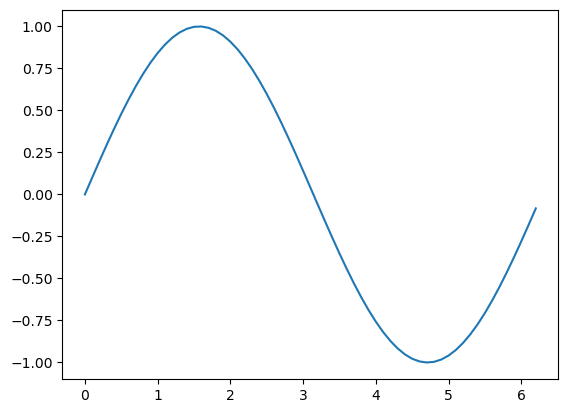

In [2]:
x = arange(0, 2*pi, step=1e-1)
y1 = sin(x)

plt.plot(x, y1);
#plt.show()  # In Spyder only

Remark: some functions (such as plot) return a `Line2D` object.
This may produce an additional output

    [<matplotlib.lines.Line2D at 0x7fdafd5e7eb8>]

To inhibt this, add `;` at the end of the last line.

**Question**

Plot $x \mapsto e^{-x}$ for $x \in [-1, 10]$.

In [3]:
# Answer

## Matplotlib APIs <a id="part1sec2"></a>
Matplotlib offers two application programming interfaces (APIs): the pyplot and the object-oriented API.

The pyplot API is a procedural manner of plotting: the user defines a sequence of line codes for creating a figure, plotting, and so on.
In the example above, we have used the pyplot API.
With it, it is very easy to produce many kinds of plots quickly.

Matplotlib can also be manipulated by way of the object-oriented API.
It is a more robust and customizable way of plotting.
Here, the user has to know that a plot is mainly made of two objects: a figure and a set of axes.
Roughly speaking, the figure is the big box in which everything is put (it is the top level container).
For instance, a figure is characterized by a size, a title and a facecolor.

The axes are the plots themselves.
There can be several plots inside a figure (also called subplots) and they are, for example, characterized by ticks, limits on x and y, a legend and a title.
The axes contain the curves plotted.

In this tutorial, we focus on the object-oriented API (even though scripts for the pyplot API are also given in comments), for which the minimal example given above is rewritten below.

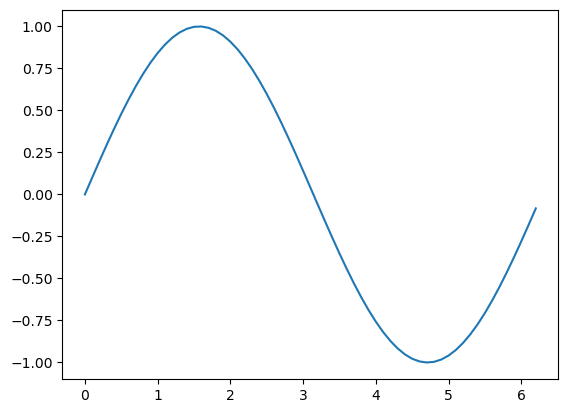

In [4]:
fig, ax = plt.subplots()  # Create a figure with a single Axes object

# This is similar to:
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)  # 1 row, 1 column, first item

ax.plot(x, y1);  # Create a curve in ax
# fig.show()  # Show the figure (in Spyder only)

Among many advantages of using the object-oriented interface of Matplotlib, one is to redraw a figure by calling it, and to add plots.

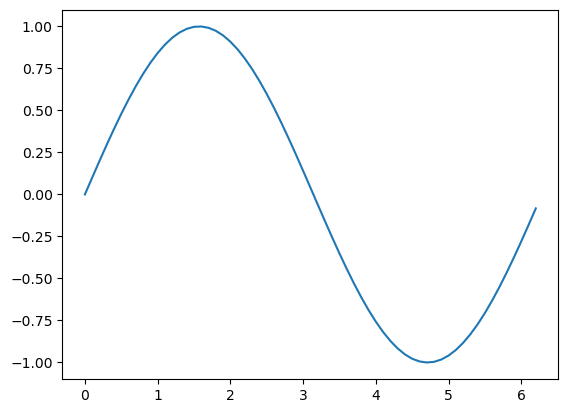

In [5]:
fig

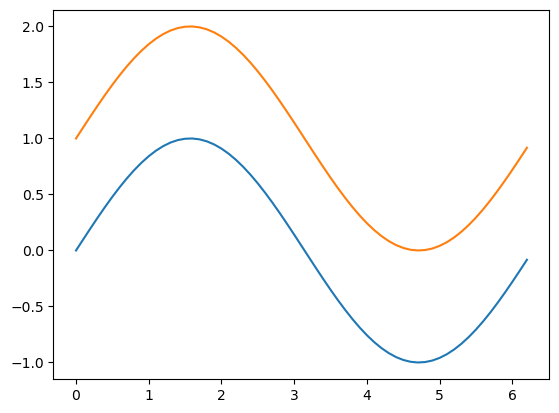

In [6]:
ax.plot(x, y1+1)
fig

## Customization <a id="part1sec3"></a>
### Grid
You can see here how to add a grid to the plot.
Grid intevals are defined by ticks.
To change these intervals, change the ticks (see below).

For log-plots, you can use:

    plt.grid(which="both")
    
to draw both major and minor tick grids.

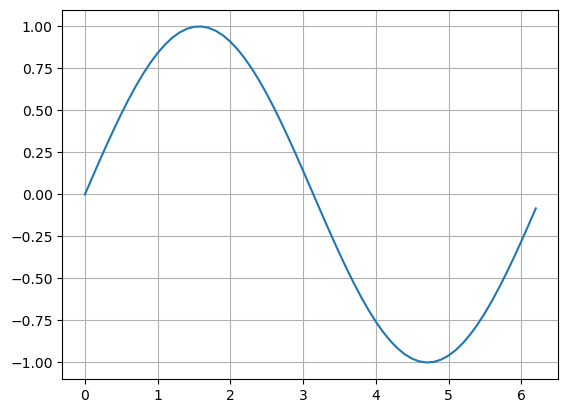

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.grid();

# Pyplot API
# plt.plot(x, y1);
# plt.grid()

### Axes labels and title

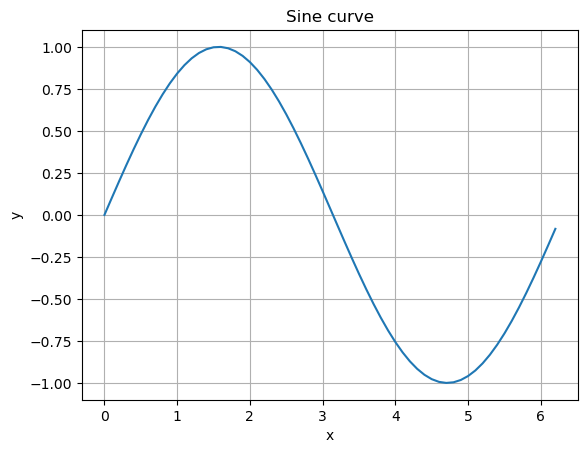

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Sine curve');

# Pyplot API
# plt.plot(x, y1)
# plt.grid()
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Sine curve");

**Question**

Plot again $x \mapsto e^{-x}$ for $x \in [-1, 10]$ and add a grid, axis labels and a title.

In [9]:
# Answer

### Legend
There are two manners to plot a legend.
The first one is to label each curve separately.

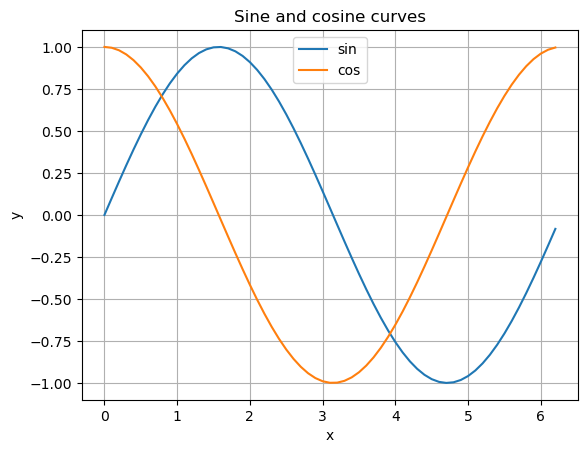

In [10]:
y2 = cos(x)

fig, ax = plt.subplots()
ax.plot(x, y1, label="sin")
ax.plot(x, y2, label="cos")
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sine and cosine curves")
ax.legend(loc="upper center");

# Pyplot API
# plt.plot(x, y1, label="sin")
# plt.plot(x, y2, label="cos")
# plt.grid()
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Sine and cosine curves")
# plt.legend(loc="upper center");

The second one is to give a list of labels to the function `legend`.

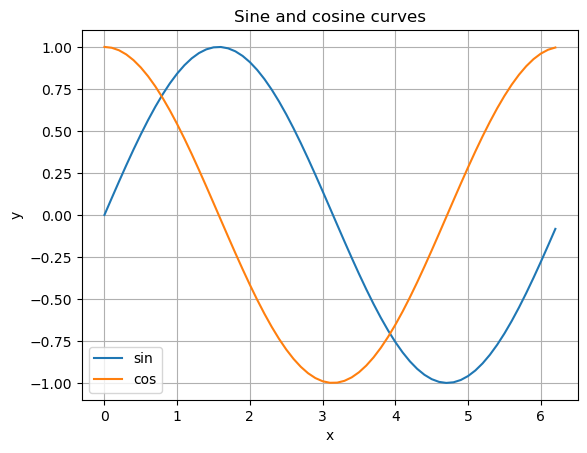

In [11]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sine and cosine curves")
ax.legend(("sin", "cos"), loc="lower left");

# Pyplot API
# plt.plot(x, y1)
# plt.plot(x, y2)
# plt.grid()
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Sine and cosine curves")
# plt.legend(("sin", "cos"), loc="lower left");

Note that all location strings are available in the [legend properties](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend).
Furthermore, the font size and the marker scale can be changed thanks to the properties `fontsize` and `markerscale` of `plt.legend`.

Let us remark that the legend can be further modified and placed outside the curve box:

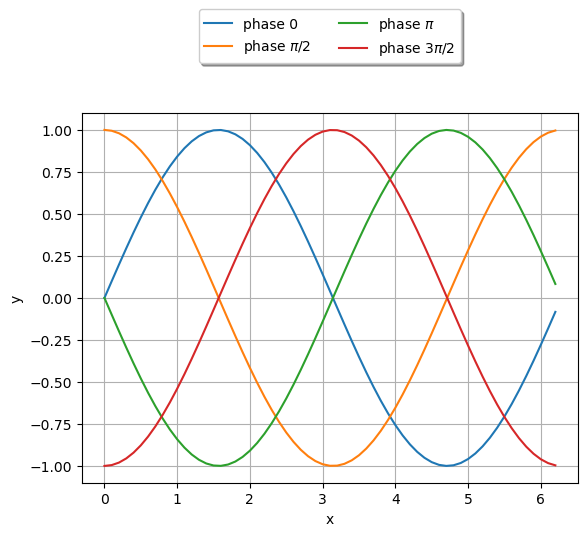

In [12]:
fig, ax = plt.subplots()
for p, s in [(0, '0'),
             (pi/2, r'$\pi/2$'),
             (pi, r'$\pi$'),
             (3*pi/2, r'$3\pi/2$')]:
    ax.plot(x, sin(x+p), label=r"phase " + s)
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2, shadow=True);

# Pyplot API
# for p, s in [(0, '0'),
#              (pi/2, r'$\pi/2$'),
#              (pi, r'$\pi$'),
#              (3*pi/2, r'$3\pi/2$')]:
#     plt.plot(x, sin(x+p), label=r"phase " + s)
# plt.grid()
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2, shadow=True);

Here:
- `r"…"` is for LaTeX support;
- `bbox_to_anchor=(0.5, 1.3)` means that the upper center of the legend is halfway through the x axis, and 0.3 above the curve box;
- `ncol=2` means that the legend spans two columns;
- `shadow=True` draws a shadow behind legend.

**Question**

Plot on the same figure the curves of $x \mapsto e^{- \gamma |x|}$ for $x \in [-1, 1]$ and $\gamma \in \{0.5, 1, \dots, 5\}$.

Add a grid and a legend in a box outside on the right of the figure.

In [13]:
# Answer

### Limits and ticks
The limits (in x and y) of the figure are automatically determined.
Nevertheless, they can be changed, as well as the ticks and their labels.

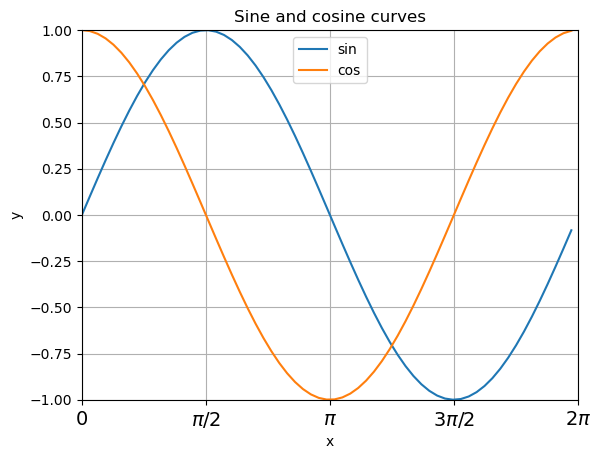

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y1, label="sin")
ax.plot(x, y2, label="cos")

ax.set_xlim(0.0, 2*pi)  # Set x limits
ax.set_xticks([t*pi/2 for t in range(5)])  # Set x ticks
ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'],
                   fontsize=14)  # Set xlabels

ax.set_ylim(-1, 1)  # Set y limits
ax.set_yticks(linspace(-1, 1, 9, endpoint=True));  # Set y ticks

ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sine and cosine curves")
ax.legend(loc="upper center");

# Pyplot API
# plt.plot(x, y1, label="sin")
# plt.plot(x, y2, label="cos")

# plt.xlim(0.0, 2*pi)  # Set x limits
# plt.xticks([t*pi/2 for t in range(5)],
#           [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'],
#           fontsize=14)  # Set x ticks and labels

# plt.ylim(-1, 1)  # Set y limits
# plt.yticks(linspace(-1, 1, 9, endpoint=True));  # Set y ticks

# plt.grid()
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Sine and cosine curves")
# plt.legend(loc="upper center");

To define manually minor and major ticks, proceed in the following way.

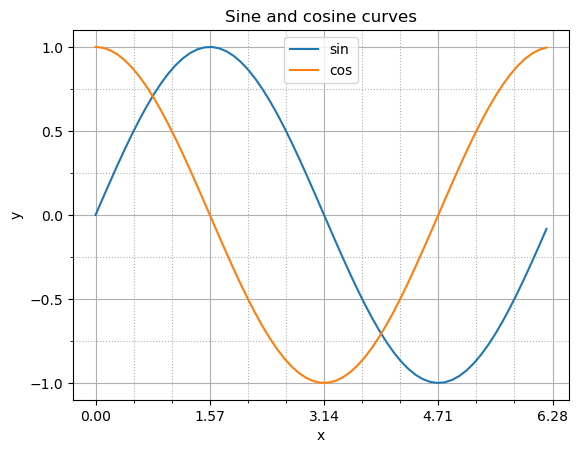

In [15]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

fig, ax = plt.subplots()
ax.plot(x, y1, label="sin")
ax.plot(x, y2, label="cos")

ax.xaxis.set_major_locator(MultipleLocator(pi/2))
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
ax.xaxis.set_minor_locator(MultipleLocator(pi/6))

ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.25))

ax.grid()  # Set major grid
ax.grid(which="minor", linestyle=":")  # Set minor grid

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sine and cosine curves")
ax.legend(loc="upper center");

# Pyplot API
# plt.plot(x, y1, label="sin")
# plt.plot(x, y2, label="cos")

# ax = plt.gca()  # gca stands for 'get current axis'
# ax.xaxis.set_major_locator(MultipleLocator(pi/2))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
# ax.xaxis.set_minor_locator(MultipleLocator(pi/6))

# ax.yaxis.set_major_locator(MultipleLocator(0.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.25))

# plt.grid()  # Set major grid
# plt.grid(which="minor", linestyle=":")  # Set minor grid

# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Sine and cosine curves")
# plt.legend(loc="upper center");

It can be seen that the Pyplot API (on its own) is not sufficient for configuring major and minor locators.

### Spines
The spines of the figure can be changes according to:
- axis positions;
- axis colors.

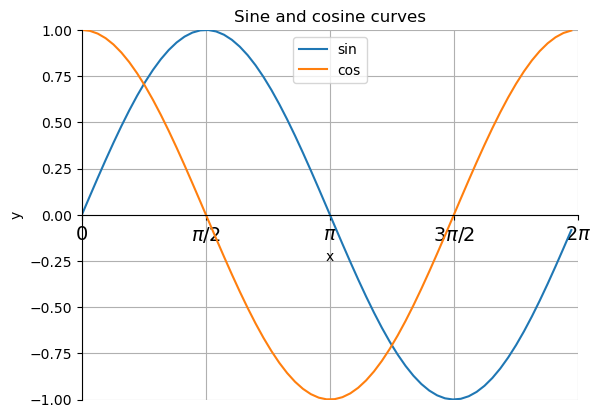

In [16]:
fig, ax = plt.subplots()
ax.plot(x, y1, label="sin")
ax.plot(x, y2, label="cos")
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sine and cosine curves")
ax.legend(loc="upper center")

# Moving spines
ax.spines['right'].set_color('none')  # Erase right axis
ax.spines['top'].set_color('none')  # Erase upper axis
ax.spines['bottom'].set_position(('data', 0))  # Set x axis at y=0
ax.spines['left'].set_position(('data', 0))  # Set y axis at x=0
ax.xaxis.set_ticks_position('bottom')  # Set ticks below the x axis
ax.yaxis.set_ticks_position('left')

ax.set_xlim(0.0, 2*pi)  # Set x limits
ax.set_xticks([t*pi/2 for t in range(5)])
ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'],
                   fontsize=14)  # Set x ticks and labels

ax.set_ylim(-1, 1)  # Set y limits
ax.set_yticks(linspace(-1, 1, 9, endpoint=True));  # Set y ticks

# Pyplot API
# plt.plot(x, y1, label="sin")
# plt.plot(x, y2, label="cos")
# plt.grid()
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Sine and cosine curves")
# plt.legend(loc="upper center")

# # Moving spines
# ax = plt.gca()  # gca stands for 'get current axis'
# ax.spines['right'].set_color('none')  # Erase right axis
# ax.spines['top'].set_color('none')  # Erase upper axis
# ax.spines['bottom'].set_position(('data', 0))  # Set x axis at y=0
# ax.spines['left'].set_position(('data', 0))  # Set y axis at x=0
# ax.xaxis.set_ticks_position('bottom')  # Set ticks below the x axis
# ax.yaxis.set_ticks_position('left')

# plt.xlim(0.0, 2*pi)  # Set x limits
# plt.xticks([t*pi/2 for t in range(5)],
#           [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'],
#           fontsize=14)  # Set x ticks and labels

# plt.ylim(-1, 1)  # Set y limits
# plt.yticks(linspace(-1, 1, 9, endpoint=True)); # Set y ticks

**Question**

Plot the curve of $x \mapsto e^{-x}$ for $x \in [-1, 10]$.
Apply the following changes:
- wipe off the right and top spines;
- move the left spine to $x=0$;
- display the major grid;
- modify minor y ticks with 0.25-interval;
- display the minor grid with the dotted line style.

In [17]:
# Answer

### Line style
The line style can be changed either with explicit parameters:

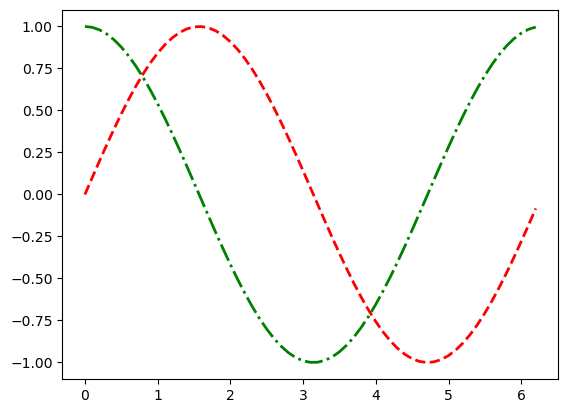

In [18]:
fig, ax = plt.subplots()
ax.plot(x, y1, linestyle='dashed', color="red", linewidth=2)
ax.plot(x, y2, linestyle='dashdot', color='green', linewidth=2);

Or with a concise code (check the [format string characters](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)):

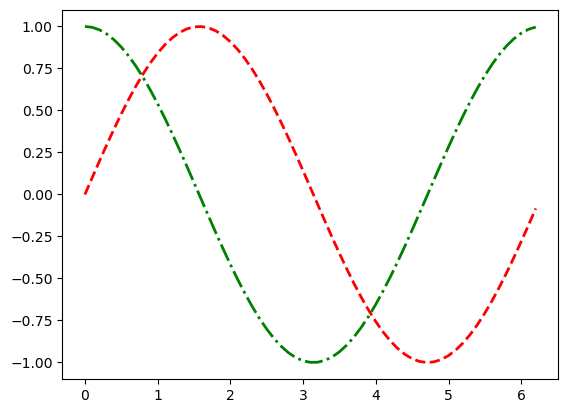

In [19]:
fig, ax = plt.subplots()
ax.plot(x, y1, 'r--', linewidth=2)
ax.plot(x, y2, 'g-.', linewidth=2);

One can also add markers on the curves:

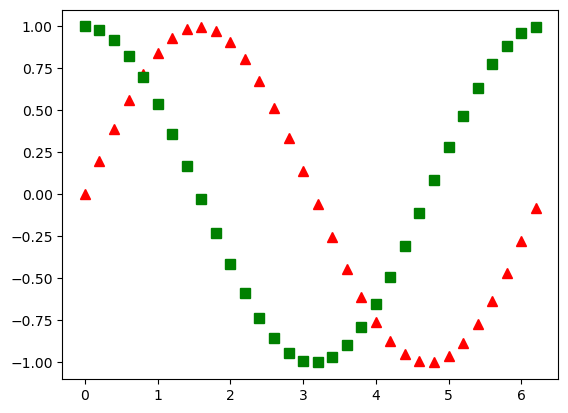

In [20]:
fig, ax = plt.subplots()
ax.plot(x, y1, linestyle='', color="red", linewidth=2, marker='^', markersize=7, markevery=2)
ax.plot(x, y2, linestyle='', color='green', linewidth=2, marker='s', markersize=7, markevery=2);

### Fill between curves
With Matplotlib, it is conceivable to enhance the esthetics of a figure, for instance by filling the space between two curves.

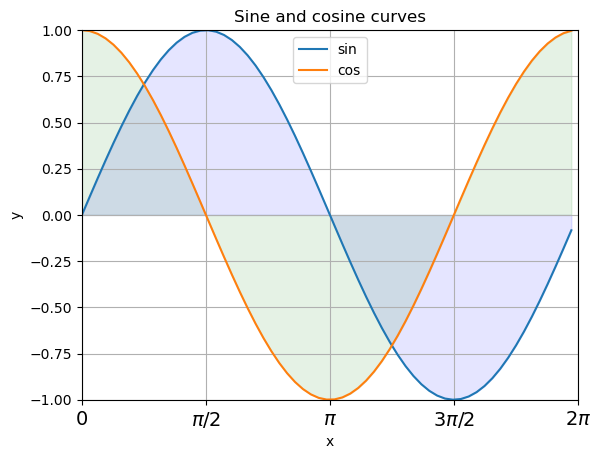

In [21]:
fig, ax = plt.subplots()
ax.plot(x, y1, label="sin")
ax.plot(x, y2, label="cos")
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sine and cosine curves")
ax.legend(loc="upper center")

ax.set_xlim(0.0, 2*pi)  # Set x limits
ax.set_xticks([t*pi/2 for t in range(5)])
ax.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'],
                   fontsize=14)  # Set x ticks and labels

ax.set_ylim(-1, 1)  # Set y limits
ax.set_yticks(linspace(-1, 1, 9, endpoint=True))  # Set y ticks

ax.fill_between(x, 0, y1, color="blue", alpha=0.1)
ax.fill_between(x, 0, y2, color="green", alpha=0.1);

# Pyplot API
# plt.plot(x, y1, label="sin")
# plt.plot(x, y2, label="cos")
# plt.grid()
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Sine and cosine curves")
# plt.legend(loc="upper center")

# plt.xlim(0.0, 2*pi)  # Set x limits
# plt.xticks([t*pi/2 for t in range(5)],
#           [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'],
#           fontsize=14)  # Set x ticks and labels

# plt.ylim(-1, 1)  # Set y limits
# plt.yticks(linspace(-1, 1, 9, endpoint=True))  # Set y ticks

# plt.fill_between(x, 0, y1, color="blue", alpha=0.1)
# plt.fill_between(x, 0, y2, color="green", alpha=0.1);

### Figure and subplots
This example highlights two features:
- defining the size of a figure;
- drawing several subfigures on the same figure.

The ticks in x and y can be shared, either in row (`sharex='row'` for instance), column (`sharey='row'` for instance) or for the whole figure (like here).

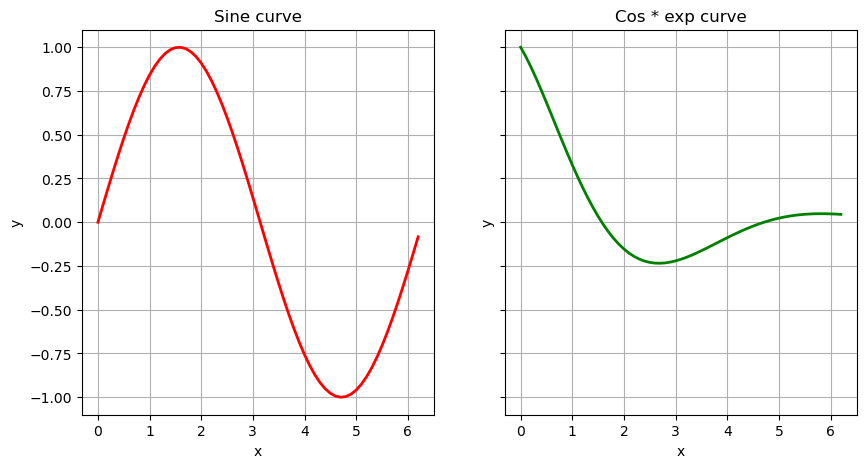

In [22]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 5))  # 1 row, 2 columns

# First subplot
ax[0].plot(x, y1, linewidth=2, color='red')
ax[0].grid()
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Sine curve")

# Second item
ax[1].plot(x, y2*exp(-x/2), linewidth=2, color='green')
ax[1].grid()
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Cos * exp curve");

# Pyplot API
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)  # 1 row, 2 columns, Item 1
# plt.plot(x, y1, linewidth=2, color='red')
# plt.grid()
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Sine curve")

# plt.subplot(1, 2, 2)  # 1 row, 2 columns, Item 2
# plt.plot(x, y2*exp(-x/2), linewidth=2, color='green')
# plt.grid()
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Cos * exp curve");

You can have much more control on subplots with `GridSpec`.

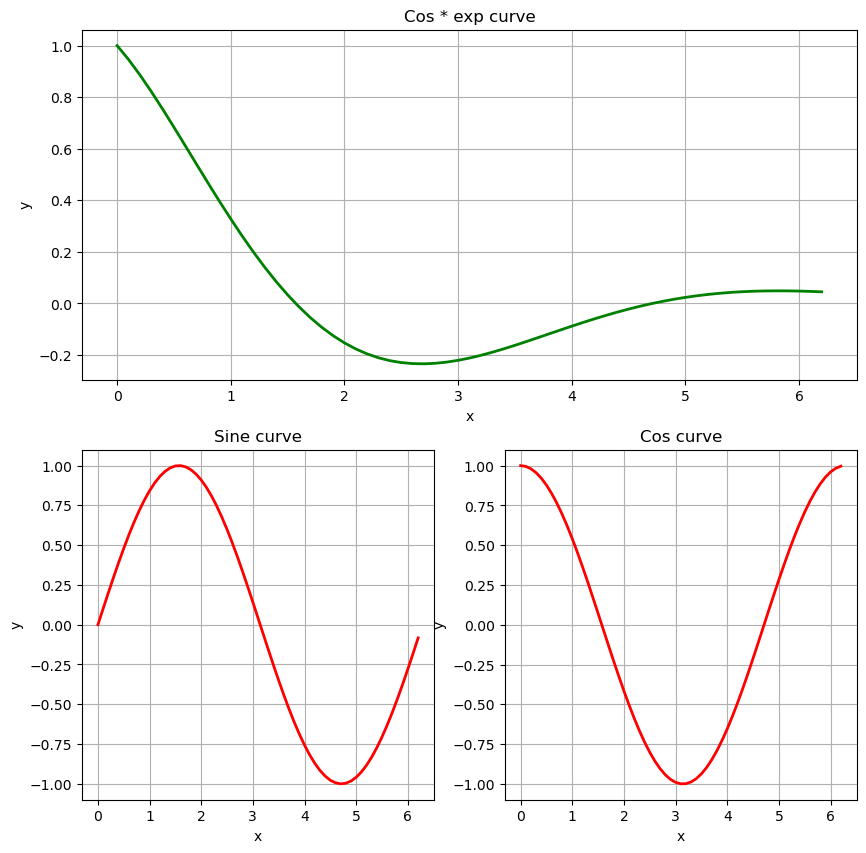

In [23]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(2, 2)  # 2 rows, 2 columns

fig = plt.figure(figsize=(10, 10))
ax = [fig.add_subplot(pos) for pos in [gs[0, :],  # First row, two columns
                                       gs[1, 0],  # Second row, left column
                                       gs[1, 1]]]  # Second row, right column

# First row, two columns
ax[0].plot(x, y2*exp(-x/2), linewidth=2, color='green')
ax[0].grid()
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Cos * exp curve");

# Second row, left column
ax[1].plot(x, y1, linewidth=2, color='red')
ax[1].grid()
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Sine curve")

# Second row, right column
ax[2].plot(x, cos(x), linewidth=2, color='red')
ax[2].grid()
ax[2].set_xlabel("x")
ax[2].set_ylabel("y")
ax[2].set_title("Cos curve");

**Question**

Plot on a 2x2 matrix the curves of the functions:
- $x \mapsto cos(x)$;
- $x \mapsto sin(x)$;
- $x \mapsto exp(x)$;
- $x \mapsto |x|$.

You can consider $x \in [-5, 5]$.
In addition, set the following parameters:
- without sharing yticks;
- sharing xticks on each row;
- setting the figure size to (10, 10);
- adding a grid and a title for each subplot.

In [24]:
# Answer

### Adding text
Text can be added with the commands `text` and `annotate` (the main [text properties](http://matplotlib.org/users/text_props.html) are: `fontsize`, `fontweight` (bold), `fontstyle` (italic), `color` and so on).
In the last case, the arrow properties can be changed.

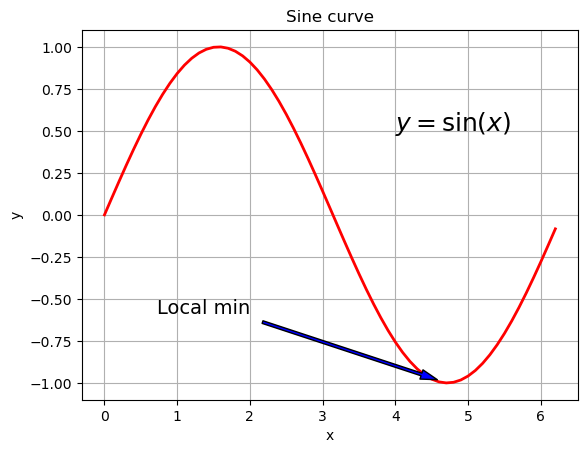

In [25]:
fig, ax = plt.subplots()
ax.plot(x, y1, linewidth=2, color='red')

ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sine curve")

ax.text(4, .5, r'$y = \sin(x)$', fontsize=18)

arrowprops = dict(facecolor='blue', width=2, headwidth=7, shrink=0.05)
ax.annotate('Local min', xy=(3*pi/2, -1), xytext=(2, -0.5), fontsize=14,
            horizontalalignment='right', verticalalignment='top', arrowprops=arrowprops);

One can also go further in the ornaments by defining text frames (see the [frame properties](http://matplotlib.org/api/patches_api.html)).

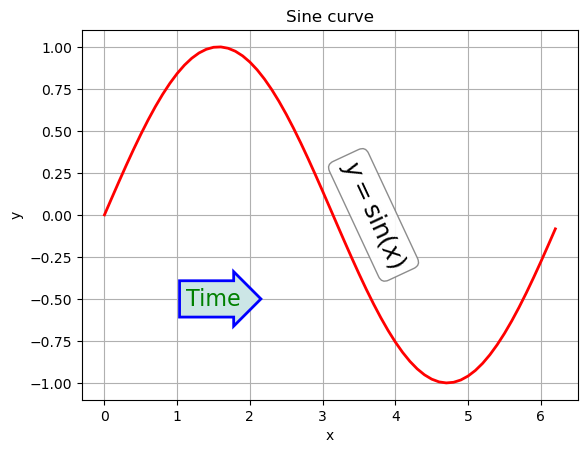

In [26]:
fig, ax = plt.subplots()

ax.plot(x, y1, linewidth=2, color='red')

ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sine curve")

bboxprops = dict(boxstyle="round", facecolor="white", edgecolor="0.5", alpha=0.9)
ax.text(3.7, 0., r'$y = \sin(x)$', horizontalalignment="center",
        verticalalignment="center", rotation=-65, fontsize=18, bbox=bboxprops)

bboxprops = dict(boxstyle="rarrow", facecolor=(0.8,0.9,0.9), edgecolor="b", linewidth=2)
ax.text(1.5, -0.5, "Time", horizontalalignment="center", verticalalignment="center",
        fontsize=16, color="green", bbox=bboxprops);

### Nonlinear axis
This example plots linear, log and mixed charts.
The option `symlog` for symmetric log scale (negative axis) can also be used.

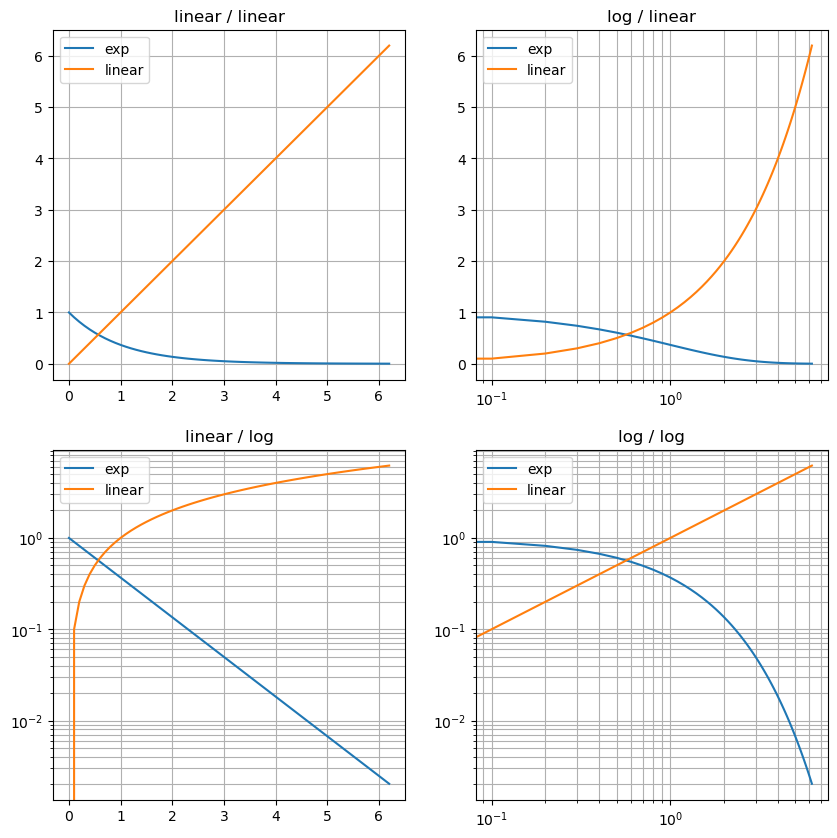

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for axis, (xscale, yscale) in zip(ax.flat, [("linear", "linear"),
                                       ("log", "linear"),
                                       ("linear", "log"),
                                       ("log", "log")]):
    axis.plot(x, exp(-x), label="exp")
    axis.plot(x, x, label="linear")
    axis.grid(which="both")  # Draw both major and minor tick grids
    axis.set_xscale(xscale)
    axis.set_yscale(yscale)
    axis.legend(loc="upper left")
    axis.set_title(xscale + ' / ' + yscale)

# Pyplot API
# plt.figure(figsize=(10, 10))

# for it, (xscale, yscale) in enumerate([("linear", "linear"),
#                                       ("log", "linear"),
#                                       ("linear", "log"),
#                                       ("log", "log")]):
#     plt.subplot(2, 2, it+1)
#     plt.plot(x, exp(-x), label="exp")
#     plt.plot(x, x, label="linear")
#     plt.grid(which="both")  # Draw both major and minor tick grids
#     plt.xscale(xscale)
#     plt.yscale(yscale)
#     plt.legend(loc="upper left")
#     plt.title(xscale + ' / ' + yscale)

**Question**

Plot the curves of $x \mapsto \frac{1}{10x}$ and $x \mapsto \frac{1}{x^2}$ for $x \in [1, 100]$.
Configure a logarithmic scale on the y axis.

In [28]:
# Answer

## Seaborn <a id="part1sec5"></a>
A way to produce nice plots with grid by default is to use the configuration provided by the `seaborn` package.
It also defines a color palette and a font.

Seaborn is a wrapper for Matplotlib.
We will see in a forthcoming chapter that this package will be very convenient for plotting dataframes.

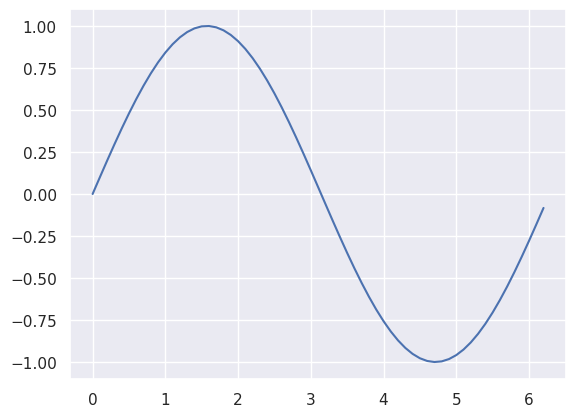

In [29]:
import seaborn as sns

sns.set()
fig, ax = plt.subplots()
ax.plot(x, y1);

In [30]:
sns.reset_defaults()  # Go back to original Matplotlib parameters

# Other plots  <a id="part2"></a>
## Image <a id="part2sec1"></a>
Matplotlib makes it possible to show images using the submodule `image` (generally nicknamed `mpimg`).
The following example reads an image and shows it.

For more details, you can refer to the [image tutorial](http://matplotlib.org/users/image_tutorial.html) and the [image API](http://matplotlib.org/api/image_api.html).

In [31]:
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread('img/anneaux.jpg')

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img);

# Pyplot API
# plt.figure(figsize=(10, 10))
# plt.imshow(img);

FileNotFoundError: [Errno 2] No such file or directory: 'img/anneaux.jpg'

Another interesting feature of plotting images is to show greyscale image with a particular [colormap](http://matplotlib.org/users/colormaps.html).
The following example plots each component of the previous RGB image, with a specific colormap.

NameError: name 'img' is not defined

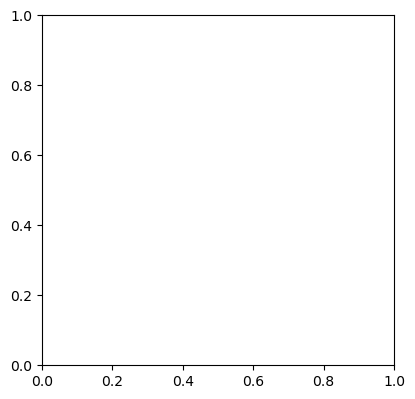

In [32]:
fig = plt.figure(figsize=(10, 10))
ax = []

for i, color in enumerate(['Reds', 'Greens', 'Blues']):
    ax.append(fig.add_subplot(2, 2, i+1))
    axim = ax[-1].imshow(img[:, :, i], cmap=color)
    fig.colorbar(axim)
    ax[i].set_title(color)

# Pyplot API
# plt.figure(figsize=(10, 10))
# for it, c in enumerate(["Reds", "Greens", "Blues"]):
#     plt.subplot(2, 2, it+1)
#     plt.imshow(img[:, :, it], cmap=c)
#     plt.title(c)
#     plt.colorbar();

## Scatter <a id="part2sec2"></a>
See the [Scatter API](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) for more details.

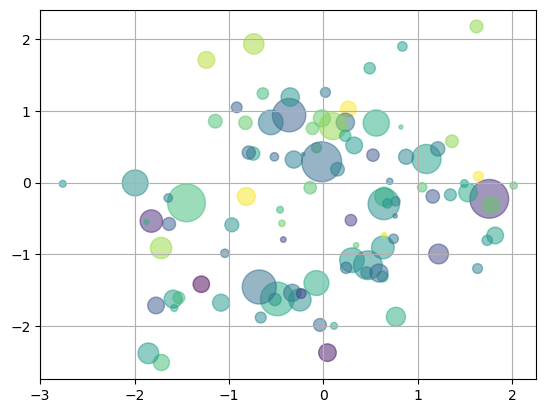

In [33]:
from numpy.random import randn
from numpy import exp

n = 100  # Number of points
x = randn(n)
y = randn(n)
size = randn(n)
color = randn(n)

size = exp(size) * 100

fig, ax = plt.subplots()
ax.scatter(x, y, c=color, s=size, alpha=0.5)  # alpha tunes transparency
ax.grid();

# Pyplot API
# plt.scatter(x, y, c=color, s=size, alpha=0.5)  # alpha tunes transparency
# plt.grid();

**Question**

Let us consider the 200 points defined below by their two coordinates *x* and *y*.
Each point is associated to a label (0 or 1), that indicates its membership.
Scatter these points with one color for each group (0 or 1) and a transparency coefficient set to $0.5$.

In [34]:
x = random.randn(200)
y = random.randn(200)
label = 2*x+y > 0

In [35]:
# Answer

## Stem  <a id="part2sec3"></a>
See the [Stem API](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.stem) for more details.

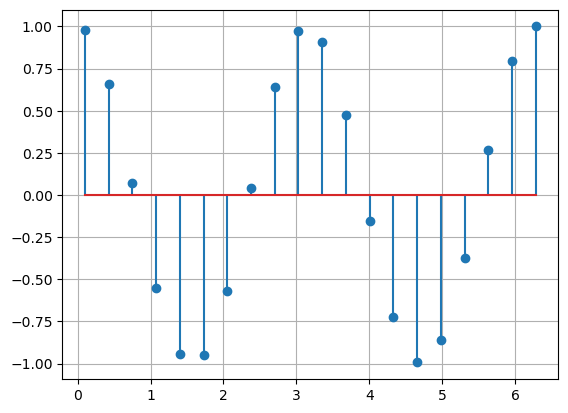

In [36]:
x = linspace(0.1, 2*pi, 20)

fig, ax = plt.subplots()
ax.stem(x, cos(2*x))
ax.grid()

# Pyplot API
# plt.stem(x, cos(2*x))
# plt.grid()

## Histogram <a id="part2sec4"></a>
See the [Hist API](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) for more details.

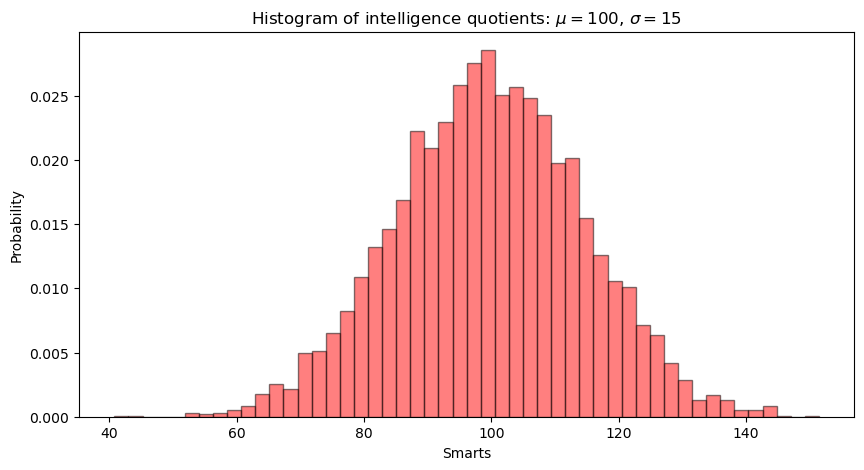

In [37]:
n = 5000  # Number of points
mu = 100  # Mean of distribution
sigma = 15  # Standard deviation of distribution
sample = mu + sigma * randn(n)

num_bins = 50  # Number of bins

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(sample, bins=num_bins, density=True, facecolor='red', alpha=0.5, edgecolor='black')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability')
ax.set_title(r'Histogram of intelligence quotients: $\mu={mu}$, $\sigma={sigma}$'.
          format(mu=mu, sigma=sigma));

# Pyplot API
# plt.figure(figsize=(10, 5))
# plt.hist(sample, num_bins, density=True, facecolor='red', alpha=0.5, edgecolor='black')
# plt.xlabel('Smarts')
# plt.ylabel('Probability')
# plt.title(r'Histogram of intelligence quotients: $\mu={mu}$, $\sigma={sigma}$'.
#           format(mu=mu, sigma=sigma));

## Bar chart <a id="part2sec5"></a>
See the [Bar API](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar) for more details.

In [38]:
# Some random data
names = ['cars', 'houses', 'pets']
means = random.rand(len(names)) * 10
std = random.rand(len(names))

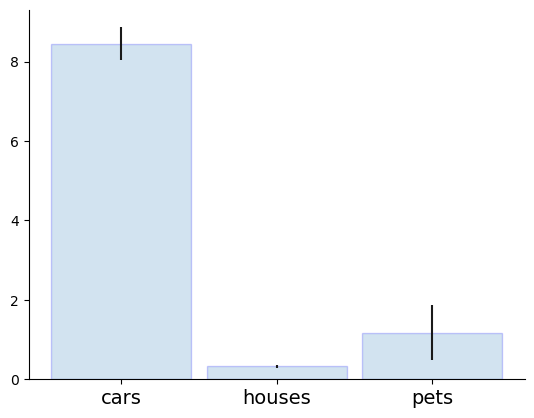

In [39]:
from numpy import arange

index = arange(len(names))  # Bar positions

fig, ax = plt.subplots()
ax.bar(index, means, width=0.9, edgecolor="blue", alpha=0.2, yerr=std)
ax.set_xticks(index)
ax.set_xticklabels(names, fontsize=14)

# Set nice axes
ax.spines['right'].set_color('none')  # Erase right axis
ax.spines['top'].set_color('none')  # Erase upper axis

## 3D plotting <a id="part2sec6"></a>
See the [mplot3d tutorial](https://matplotlib.org/tutorials/toolkits/mplot3d.html)
and the [mplot3d API](https://matplotlib.org/api/toolkits/mplot3d.html#toolkit-mplot3d-api) for more details.

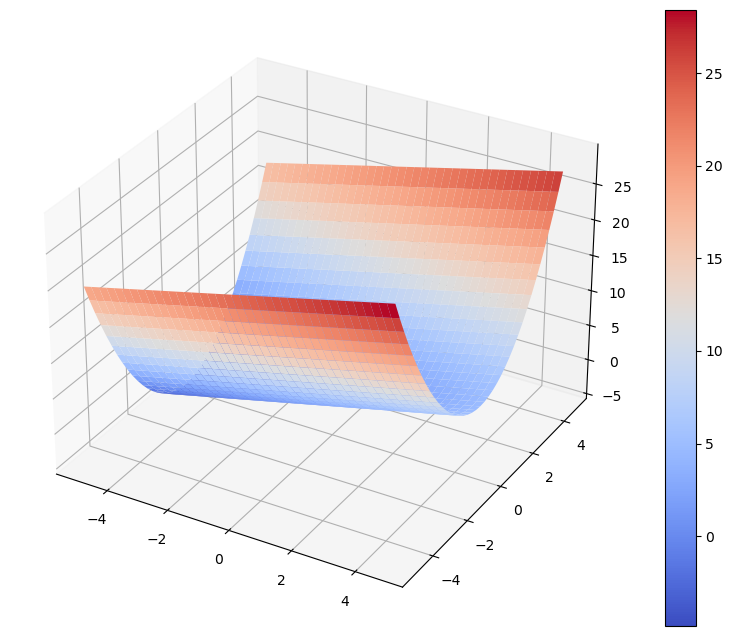

In [40]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy import meshgrid

# Polynomial
x = arange(-5, 5, 0.25)
y = arange(-5, 5, 0.25)
X, Y = meshgrid(x, y)
Z = X + Y**2

# Initialize 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Plot
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)

# Colorbar
fig.colorbar(surf);

## Pie chart <a id="part2sec7"></a>
See the [pie API](http://matplotlib.org/a []pi/pyplot_api.html#matplotlib.pyplot.pie)
and [color names](http://matplotlib.org/examples/color/named_colors.html) for more details.

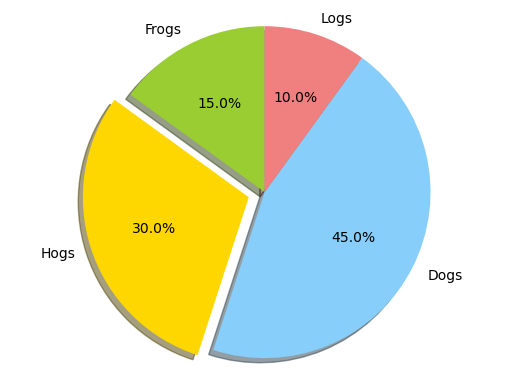

In [41]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = 0, 0.1, 0, 0  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.axis('equal');

# Saving figures <a id="part3"></a>


FileNotFoundError: [Errno 2] No such file or directory: 'img/polynomial.png'

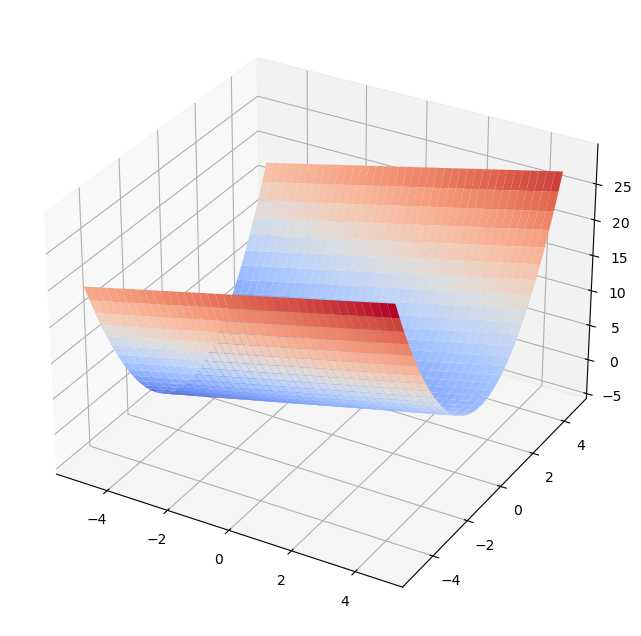

In [42]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)

fig.savefig("img/polynomial.png", dpi=150, bbox_inches="tight", transparent=True)

Image saved:

<img src="https://perso.lpsm.paris/~msangnier/files/pythonM2/img/polynomial.png" width=500>

# Exercises <a id="part5"></a>
## Exercise 1 <a id="part5sec1"></a>
Plot the probability density functions of the exponential distributions with parameters $\lambda \in \{0.5, 1, \dots, 2.5\}$.
Do not forget to add a legend with LaTeX support.

In [ ]:
# Answer

## Exercise 2 <a id="part5sec2"></a>
Plot the Lemniscate of Bernoulli parametrized by:
$$
    x = \frac{\sqrt 2 \cos(t)}{\sin(t)^2+1},
$$
$$
    y = \frac{\sqrt 2 \cos(t) \sin(t)}{\sin(t)^2+1}.
$$
Annotate the points parametrized by $t = \frac{n\pi}{4}$ for $n \in \{0, 1, \dots 7\}$.

In [ ]:
# Answer

## Exercise 3 <a id="part5sec3"></a>
Subplot the mass function of a Poisson distribution with parameter $\lambda \in \{1, 2, 4, 10\}$.
Set the limits of the y axis to [0, 0.4] for each subplot and do not forget to add a legend with LaTeX support.

In [ ]:
# Answer

## Exercise 4 <a id="part5sec4"></a>
Plot a histogram of the first line of the first layer (red component) of the [UPMC image](http://www.lpsm.paris/pageperso/sangnier/files/pythonM2/img/upmc.jpg).

In [ ]:
# Answer

## Exercise 5 <a id="part5sec5"></a>
Create a 3D plot for the function $(x, y) \mapsto x^2 + y^3$.

In [ ]:
# Answer

## Exercise 6 <a id="part5sec6"></a>
Create a figure similar to Kandinsky's painture, called *several circles*.
Do not forget to erase the axes and the ticks.
<img src="https://perso.lpsm.paris/~msangnier/files/pythonM2/img/cercles.jpg" width=300>

In [ ]:
# Answer

# References <a id="part6"></a>
- [Matplotlib beginner's guide](http://matplotlib.org/users/beginner.html).
- [Pyplot API](http://matplotlib.org/api/pyplot_api.html).
- [Scipy lecture notes](http://www.scipy-lectures.org/index.html).